In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Yenumula Pavan 
# 202051208
# DAV Assignement-9

In [2]:
CC_Df=pd.read_csv('cookie_cats.csv')
print(CC_Df.head())
# CC_Df.isna().sum()
# No null entries
# len(CC_Df)

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


# Task-1 :
## Checking which version is better (Either 'gate_30' or 'gate_40') by means of computing average sum_gamerounds for each of the version

In [3]:
Average_Sum_GameRound_Gate_30=CC_Df[CC_Df.version=='gate_30']['sum_gamerounds'].mean()
Average_Sum_GameRound_Gate_40=CC_Df[CC_Df.version=='gate_40']['sum_gamerounds'].mean()
print(f'Average sum of game rounds for version gate30 : {Average_Sum_GameRound_Gate_30}')
print(f'Average sum of game rounds for version  gate40 : {Average_Sum_GameRound_Gate_40}')

Average sum of game rounds for version gate30 : 52.45626398210291
Average sum of game rounds for version  gate40 : 51.29877552814966


In [4]:
# Displaying which version is better
if(Average_Sum_GameRound_Gate_30>Average_Sum_GameRound_Gate_40) :
    print('gate_30 version is better')
else :
    print('gate_40 version is better')

gate_30 version is better


# Task-2

In [5]:
set(random.sample(range(30), 10))
set(random.sample(range(30), 20))

{0, 1, 3, 4, 6, 8, 10, 12, 14, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29}

In [6]:
set(range(20))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [10]:
No_of_version_group30=(CC_Df.version == 'gate_30').sum()
Total=len(CC_Df)
No_of_version_group40=Total-No_of_version_group30
def perm_fun(sums):
    Indices_40 = set(random.sample(range(Total), No_of_version_group40))
    Indices_30 = set(range(Total)) - Indices_40
    return sums.loc[list(Indices_40)].mean() - sums.loc[list(Indices_30)].mean()

Differences = [perm_fun(CC_Df.sum_gamerounds) for _ in range(1000)]

Text(0.5, 200, 'Observed\ndifference')

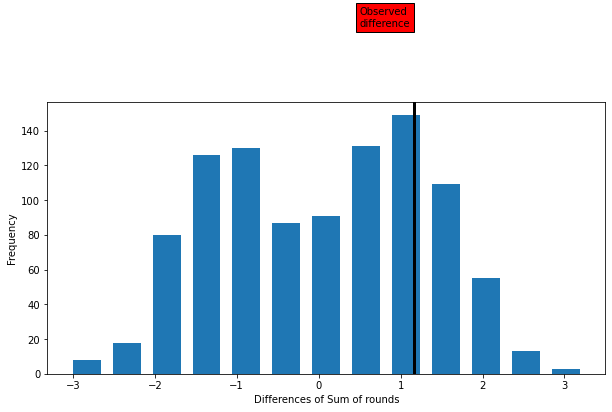

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(perm_diffs, bins=13, rwidth=0.7)
ax.set_xlabel('Differences of Sum of rounds')
ax.set_ylabel('Frequency')

ax.axvline(x = Average_Sum_GameRound_Gate_30 - Average_Sum_GameRound_Gate_40, color='black', lw=3)

ax.text(0.5, 200, 'Observed\ndifference',bbox={'facecolor':'Red'})


In [30]:
tmp=np.mean(Differences) > Average_Sum_GameRound_Gate_40 - Average_Sum_GameRound_Gate_30
print(tmp.sum())
np.mean(tmp)

1


1.0